# Q1

**Prepare a prediction model for profit of 50_startups data.**

**Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.**

**R&D Spend -- Research and devolop spend in the past few years**

**Administration -- spend on administration in the past few years**

**Marketing Spend -- spend on Marketing in the past few years**

**State -- states from which data is collected**

**Profit  -- profit of each state in the past few years**

### *Dependent Variable: Profit*

### *Independent Variables: R&D Spend, Administration, Marketing Spend, State*

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [2]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## PERFORM EXPLORATORY DATA ANALYSIS

In [3]:
#changing the column names
#modifying column names Delivery Time as dt and Sorting Time as st
df=data.rename({'R&D Spend':'rd','Administration':'a','Marketing Spend':'ms','State':'s','Profit':'p'},axis=1)
df=df.copy()

In [4]:
#Viewing no. of rows and columns in the data
df.shape

(50, 5)

In [5]:
#Viewing the overall basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   a       50 non-null     float64
 2   ms      50 non-null     float64
 3   s       50 non-null     object 
 4   p       50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
#Checking for null values in the data
df.isnull().sum()

rd    0
a     0
ms    0
s     0
p     0
dtype: int64

In [7]:
#Checking for duplicated values in the data
df[df.duplicated()]

,rd,a,ms,s,p


In [8]:
#Removing unncessary columns
df.drop(columns='s')
df

,rd,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
#checking for data that has 0 as values in each column
print('No. of observations with "0" as value in R&D Spends column: ',(df['rd']==0).sum(),'\n')
print('No. of observations with "0" as value in Administration column: ',(df['a']==0).sum(),'\n')
print('No. of observations with "0" as value in Marketing Spends column: ',(df['ms']==0).sum(),'\n')
print('No. of observations with "0" as value in Profits column: ',(df['p']==0).sum())

No. of observations with "0" as value in R&D Spends column:  2 

No. of observations with "0" as value in Administration column:  0 

No. of observations with "0" as value in Marketing Spends column:  3 

No. of observations with "0" as value in Profits column:  0


## GETTING STATISTICAL INFORMATION OF THE DATA

In [10]:
df.describe()

,rd,a,ms,p
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [11]:
#correlation values
df.corr()

,rd,a,ms,p
rd,1.000000,0.241955,0.724248,0.972900
a,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
p,0.972900,0.200717,0.747766,1.000000


## VISUALIZATION

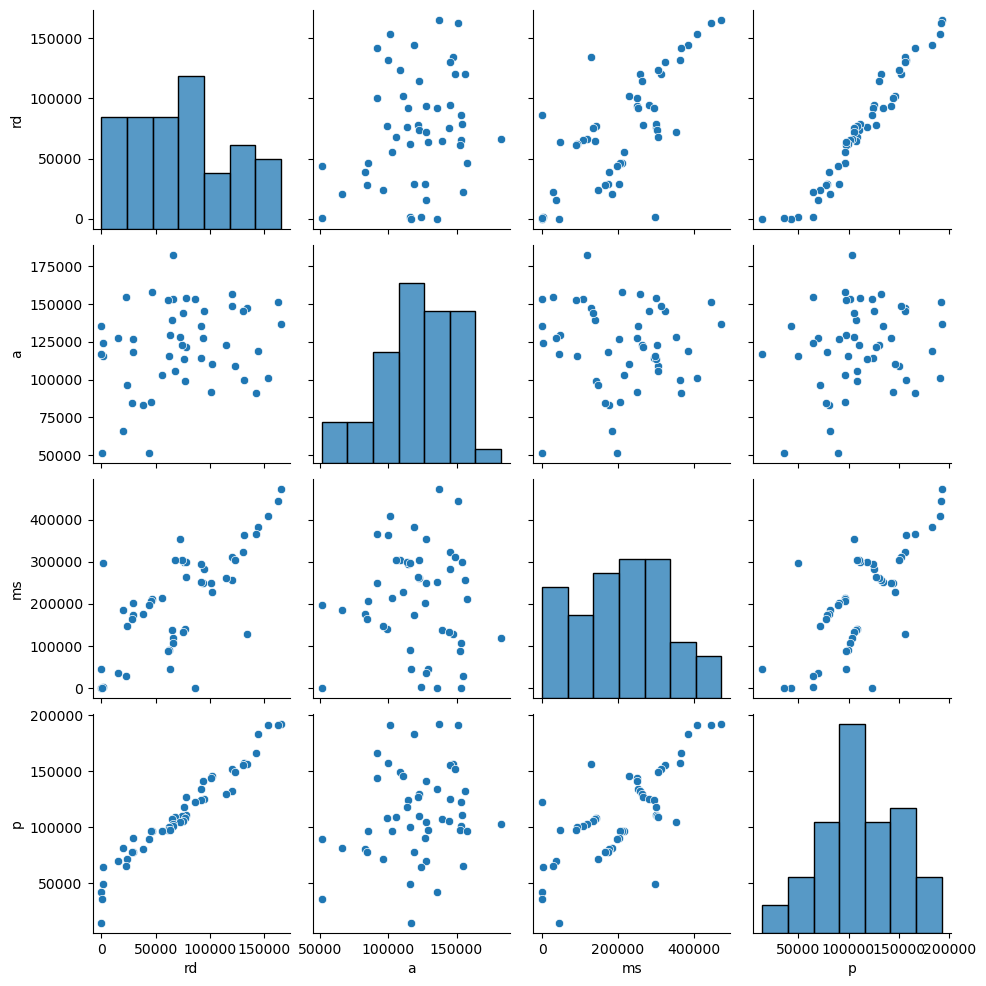

In [12]:
#PAIR PLOT
sns.pairplot(df)
plt.show()

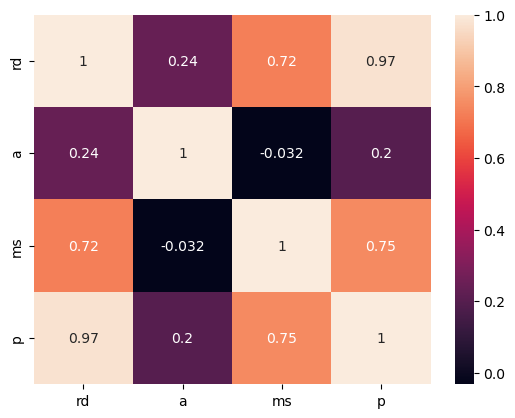

In [13]:
#heatmap for correations 
sns.heatmap(df.corr(),annot=True)
plt.show()

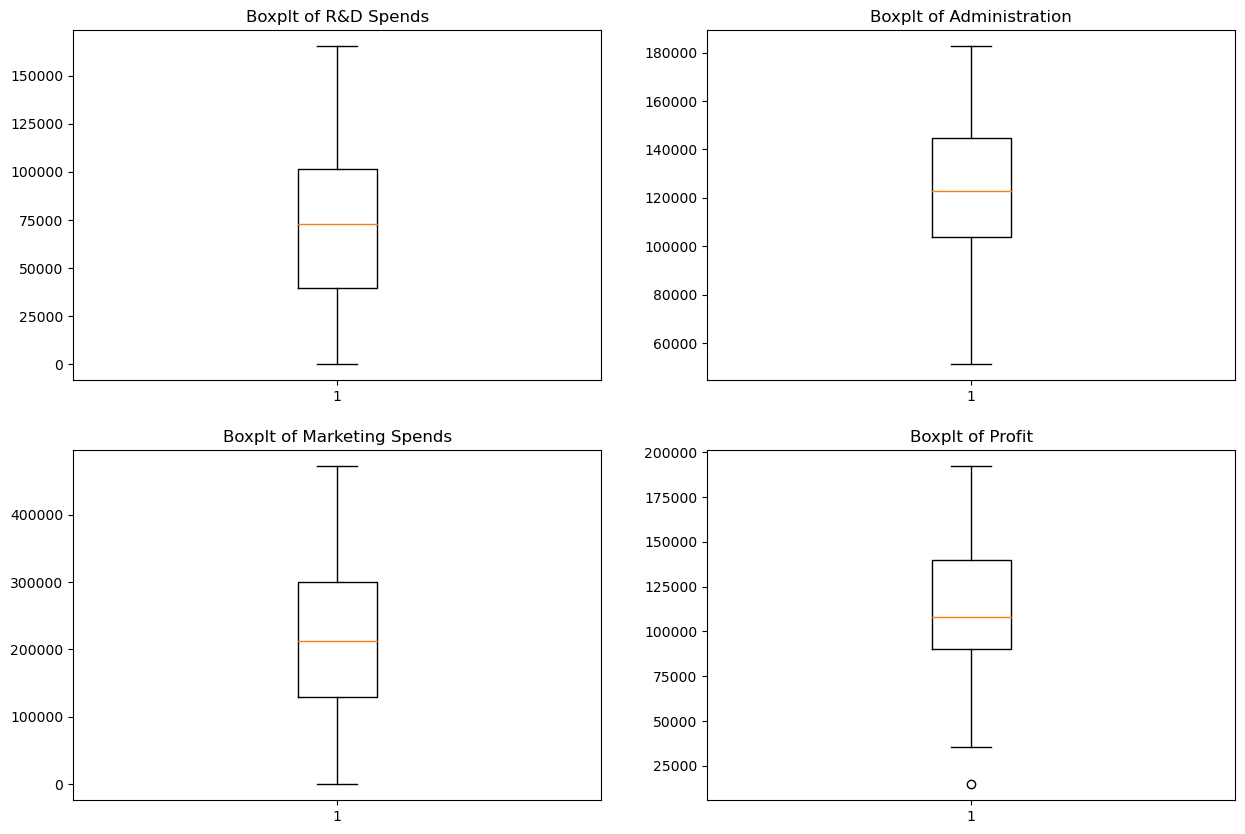

In [14]:
#Boxplots
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Boxplt of R&D Spends')
plt.boxplot(df['rd'])
plt.subplot(222)
plt.title('Boxplt of Administration')
plt.boxplot(df['a'])
plt.subplot(223)
plt.title('Boxplt of Marketing Spends')
plt.boxplot(df['ms'])
plt.subplot(224)
plt.title('Boxplt of Profit')
plt.boxplot(df['p'])
plt.show()

**Hence, we can see that the Profits Column has a oulier**

## HANDLING OUTLIER

In [15]:
q1=df['p'].quantile(0.05)
q3=df['p'].quantile(0.95)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [16]:
Outliers = df['p'][(df['p'] <= lb) | (df['p'] >= ub)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: Series([], Name: p, dtype: float64)


In [17]:
df[df.index.isin([49])]

,rd,a,ms,s,p
49,0.0,116983.8,45173.06,California,14681.4


In [18]:
df=df.drop(labels=49)
df

,rd,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [19]:
q1_new=df['p'].quantile(0.05)
q3_new=df['p'].quantile(0.95)
iqr_new=q3_new-q1_new
ub_new=q3_new+1.5*iqr_new
lb_new=q1_new-1.5*iqr_new
Outliers_new = df['p'][(df['p'] <= lb_new) | (df['p'] >= ub_new)]
print('The outlier in the boxplot:',Outliers_new)

The outlier in the boxplot: Series([], Name: p, dtype: float64)


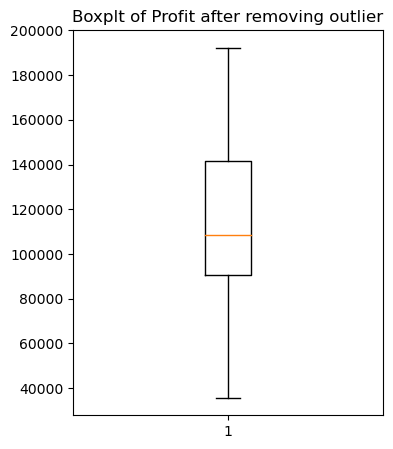

In [20]:
plt.figure(figsize=(4,5))
plt.title('Boxplt of Profit after removing outlier')
plt.boxplot(df['p'])
plt.show()

In [21]:
data.shape #before removing outlier

(50, 5)

In [22]:
df.shape #after removing the outlier

(49, 5)

## Descriptive Statistics after removing the outlier

In [23]:
df.describe()

,rd,a,ms,p
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      49 non-null     float64
 1   a       49 non-null     float64
 2   ms      49 non-null     float64
 3   s       49 non-null     object 
 4   p       49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [25]:
df.corr()

,rd,a,ms,p
rd,1.000000,0.243438,0.711654,0.978437
a,0.243438,1.000000,-0.037280,0.205841
ms,0.711654,-0.037280,1.000000,0.739307
p,0.978437,0.205841,0.739307,1.000000


## Visualization after removing the outlier

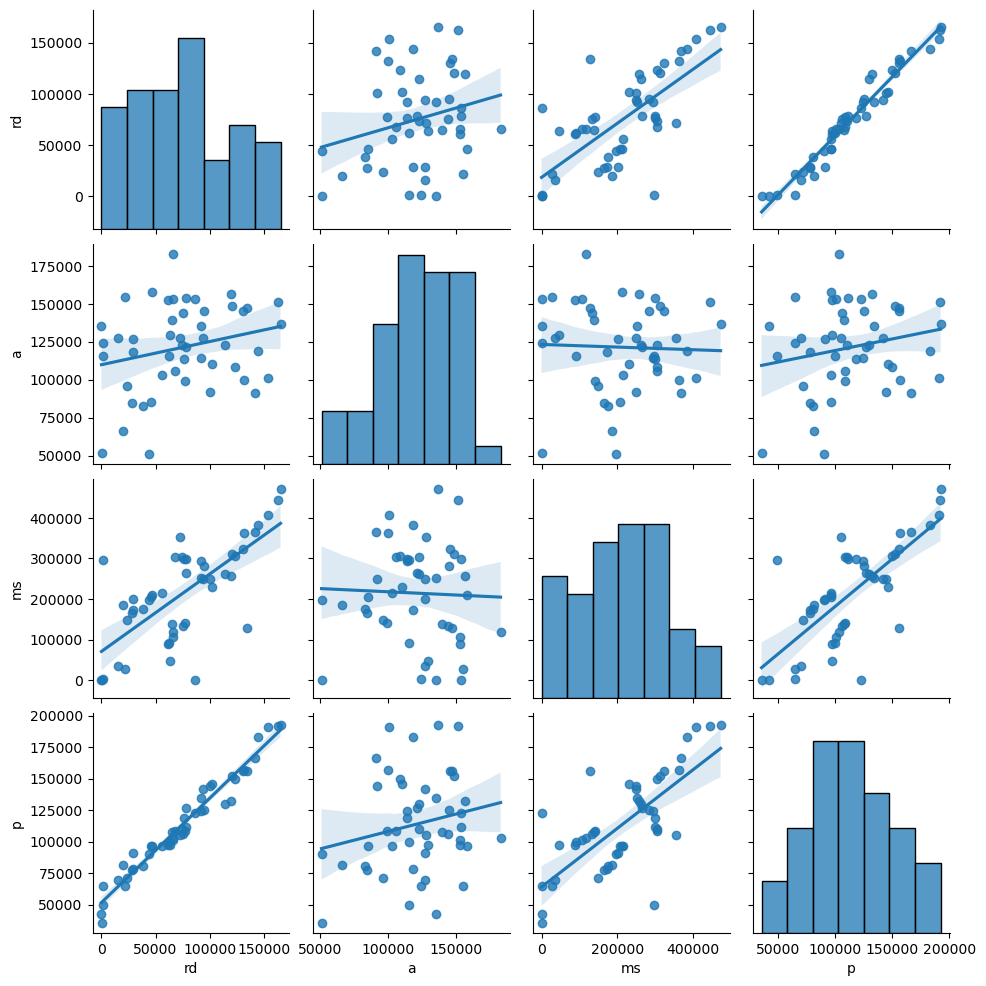

In [26]:
sns.pairplot(df,kind='reg')

## MODEL BUILDING

**Using Ordinary Least Squares Method**

In [27]:
model = smf.ols('p~rd+a+ms',data=df).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.85e-32
Time:                        18:37:13   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd             0.7830      0.038     20.470      0.000       0.706       0.860
a             -0.0222      0.043     -0.518      0.607      -0.109       0.064
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model.pvalues

Intercept    2.960000e-12
rd           1.971077e-24
a            6.070728e-01
ms           7.458443e-02
dtype: float64

**From the above, the p-value of a(administration) is 6.070728e-01 > 0.05**

**Therefore, there is a problem of multi-collinearity among profit and administration**

**Resolving the problem of collinearity**

### APPLYING LINEAR REGRESSION

**To check whether the administration has any effect on the profit**

**Dependent variable in simple linear regression:** p(profit)

**Independent variable in simple linear regression:** a(administration)

In [30]:
model_slr=smf.ols('p~a',df).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 31 Jan 2024   Prob (F-statistic):              0.156
Time:                        18:37:13   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
a              0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model_slr.pvalues

Intercept    0.001618
a            0.155918
dtype: float64

**Since, the p-value for a(administration) is 0.155 which is greater than significant level (0.05). variable 'a' is insignificant in the model**

In [32]:
model=smf.ols('p~rd+ms',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.74e-33
Time:                        18:37:13   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
rd             0.7754      0.035     22.136      0.000       0.705       0.846
ms             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
model.pvalues

Intercept    1.970460e-25
rd           3.628510e-26
ms           4.084443e-02
dtype: float64

In [34]:
model.rsquared,model.rsquared_adj

(0.9610856807456628, 0.9593937538215612)

**Hence, the accuracy of the model is 96.1%**

## MODEL VALIDATION

Text(0, 0.5, 'standardized residual values')

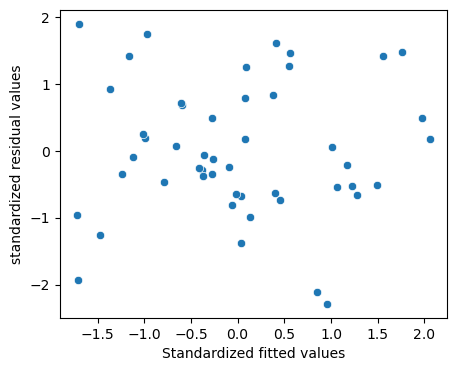

In [35]:
#RESIDUAL PLOT
def standardize(vals):
    e = (vals - vals.mean())/vals.std()
    return e
plt.figure(figsize=(5,4))
sns.scatterplot(x = standardize(model.fittedvalues),y = standardize(model.resid) )
plt.xlabel("Standardized fitted values") # fitted values= predicted values
plt.ylabel("standardized residual values")

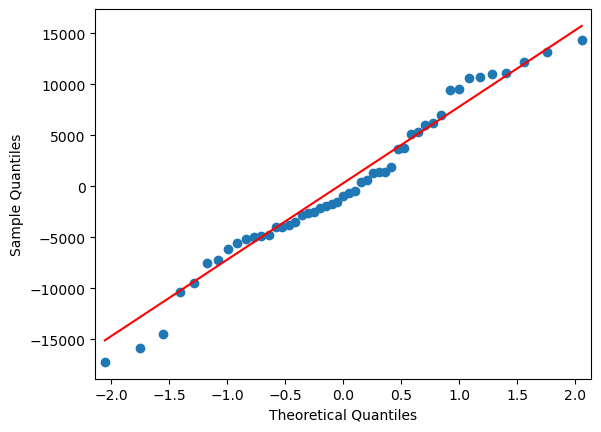

In [36]:
#QQ-PLOT
qq=sm.qqplot(model.resid,line="q")

eval_env: 1


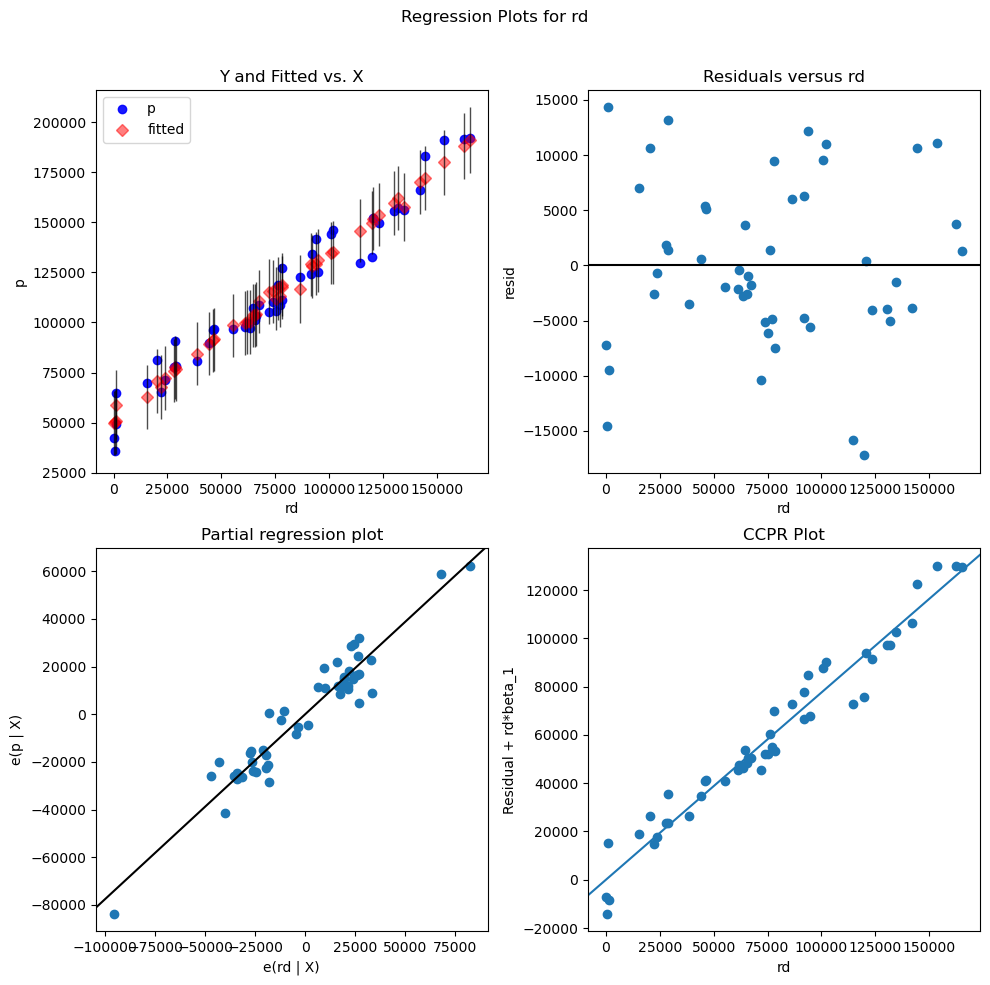

In [37]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(model,'rd',fig=fig)
plt.show()

eval_env: 1


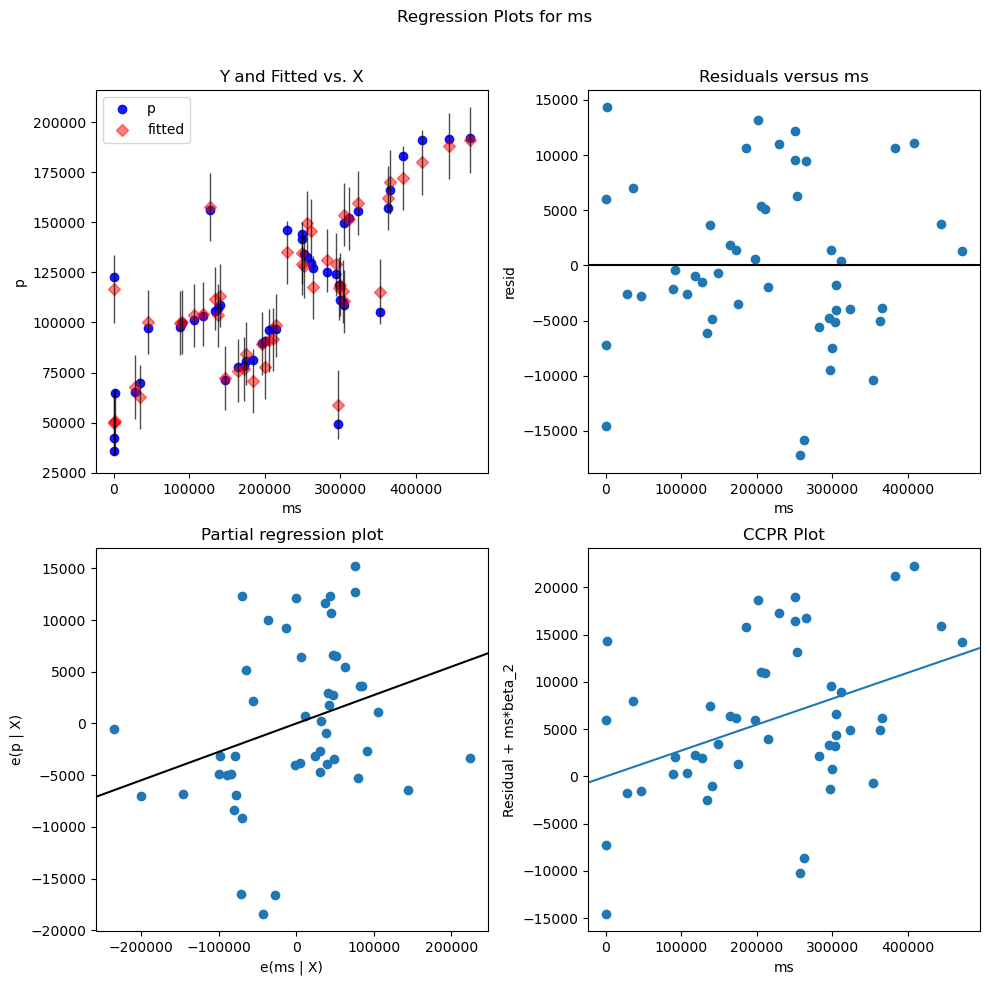

In [38]:
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(model,"ms",fig=fig)
plt.show()

## PREDICTING PROFIT

In [39]:
pred=np.round(model.predict(),2)
pred

array([190942.73, 188043.92, 179957.31, 172246.42, 170022.69, 161999.41,
       157669.18, 159705.3 , 151804.38, 153787.52, 135096.47, 134699.05,
       129422.68, 128049.2 , 149827.45, 145769.61, 117530.49, 130936.3 ,
       129020.31, 116793.71, 117108.28, 118793.64, 115484.21, 110513.44,
       113382.1 , 103711.7 , 111873.13, 115389.65, 104243.19, 103595.17,
       100355.93,  99610.63, 100216.31,  98705.15,  91568.75,  91104.34,
        77530.72,  89363.97,  70555.66,  84485.86,  76823.38,  75926.97,
        72178.03,  62783.42,  67759.19,  50613.09,  58959.71,  49785.27,
        50205.57])

In [40]:
df=df.rename({'rd':'R&D Spend','a':'Adminostration','ms':'Marketing Spend','s':'State','p':'Profit'},axis=1)
df['Predicted Profiit']=pred
df

,R&D Spend,Adminostration,Marketing Spend,State,Profit,Predicted Profiit
0,165349.20,136897.80,471784.10,New York,192261.83,190942.73
1,162597.70,151377.59,443898.53,California,191792.06,188043.92
2,153441.51,101145.55,407934.54,Florida,191050.39,179957.31
3,144372.41,118671.85,383199.62,New York,182901.99,172246.42
4,142107.34,91391.77,366168.42,Florida,166187.94,170022.69
5,131876.90,99814.71,362861.36,New York,156991.12,161999.41
6,134615.46,147198.87,127716.82,California,156122.51,157669.18
7,130298.13,145530.06,323876.68,Florida,155752.60,159705.30
8,120542.52,148718.95,311613.29,New York,152211.77,151804.38
9,123334.88,108679.17,304981.62,California,149759.96,153787.52


# Q1

**Prepare a prediction model for profit of 50_startups data.**

**Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.**

**R&D Spend -- Research and devolop spend in the past few years**

**Administration -- spend on administration in the past few years**

**Marketing Spend -- spend on Marketing in the past few years**

**State -- states from which data is collected**

**Profit  -- profit of each state in the past few years**

### *Dependent Variable: Profit*

### *Independent Variables: R&D Spend, Administration, Marketing Spend, State*

## IMPORT LIBRARIES

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [42]:
data=pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## PERFORM EXPLORATORY DATA ANALYSIS

In [43]:
#changing the column names
#modifying column names Delivery Time as dt and Sorting Time as st
df=data.rename({'R&D Spend':'rd','Administration':'a','Marketing Spend':'ms','State':'s','Profit':'p'},axis=1)
df=df.copy()

In [44]:
df.shape

(50, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   a       50 non-null     float64
 2   ms      50 non-null     float64
 3   s       50 non-null     object 
 4   p       50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [46]:
df.isnull().sum()

rd    0
a     0
ms    0
s     0
p     0
dtype: int64

In [47]:
df[df.duplicated()]

,rd,a,ms,s,p


In [48]:
#Removing unncessary columns
df.drop(columns='s')
df

,rd,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
#checking for data that has 0 as values in each column
print('No. of observations with "0" as value in R&D Spends column: ',(df['rd']==0).sum(),'\n')
print('No. of observations with "0" as value in Administration column: ',(df['a']==0).sum(),'\n')
print('No. of observations with "0" as value in Marketing Spends column: ',(df['ms']==0).sum(),'\n')
print('No. of observations with "0" as value in Profits column: ',(df['p']==0).sum())

No. of observations with "0" as value in R&D Spends column:  2 

No. of observations with "0" as value in Administration column:  0 

No. of observations with "0" as value in Marketing Spends column:  3 

No. of observations with "0" as value in Profits column:  0


## GETTING STATISTICAL INFORMATION OF THE DATA

In [50]:
df.describe()

,rd,a,ms,p
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [51]:
#correlation values
df.corr()

,rd,a,ms,p
rd,1.000000,0.241955,0.724248,0.972900
a,0.241955,1.000000,-0.032154,0.200717
ms,0.724248,-0.032154,1.000000,0.747766
p,0.972900,0.200717,0.747766,1.000000


## VISUALIZATION

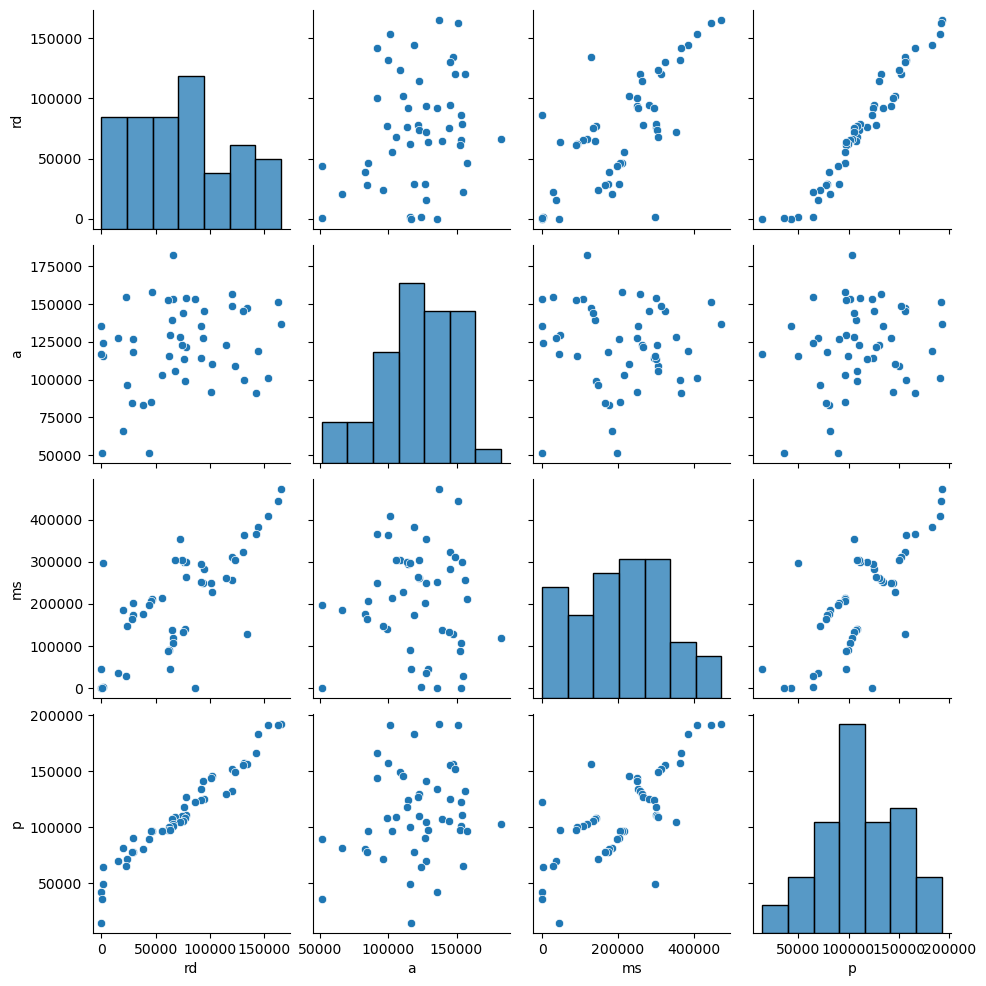

In [52]:
#PAIR PLOT
sns.pairplot(df)
plt.show()

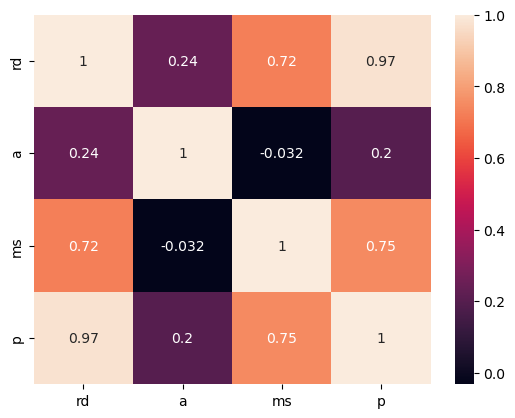

In [53]:
#heatmap for correations 
sns.heatmap(df.corr(),annot=True)
plt.show()

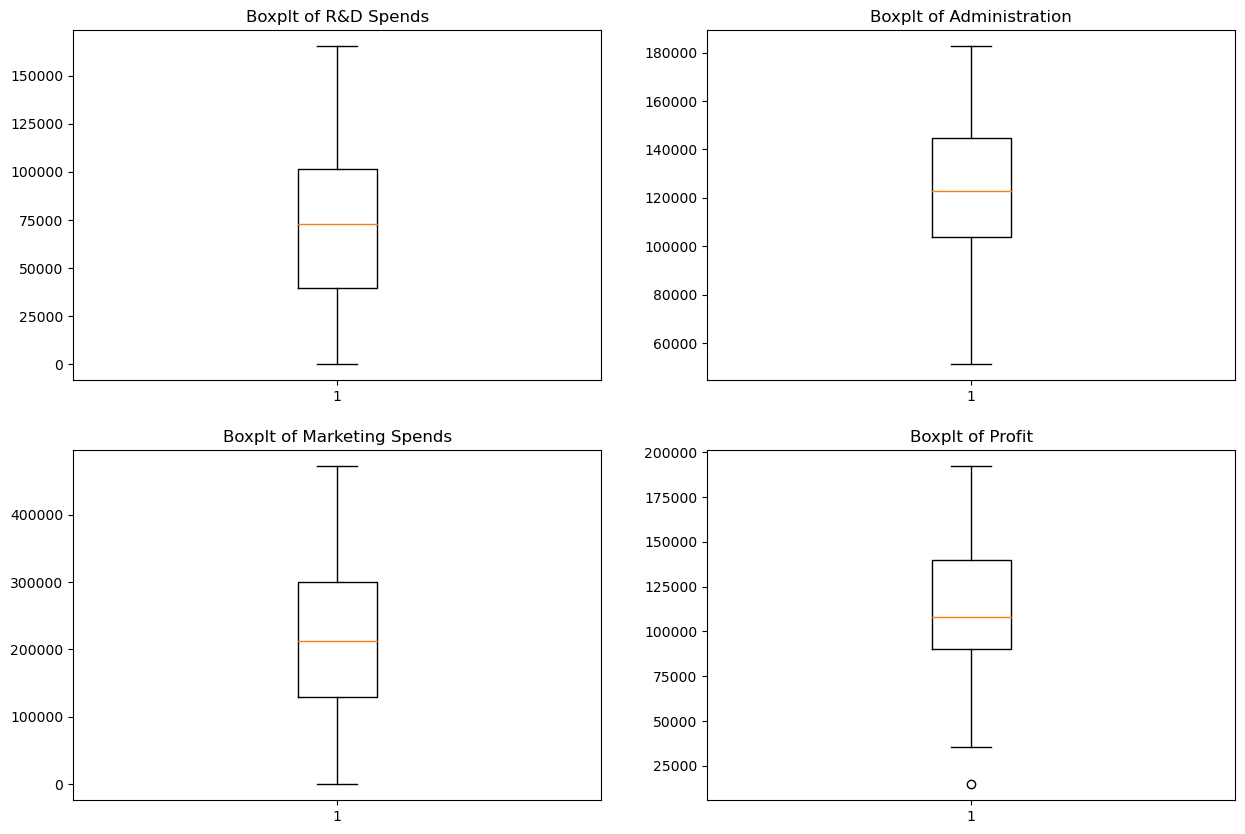

In [54]:
#Boxplots
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Boxplt of R&D Spends')
plt.boxplot(df['rd'])
plt.subplot(222)
plt.title('Boxplt of Administration')
plt.boxplot(df['a'])
plt.subplot(223)
plt.title('Boxplt of Marketing Spends')
plt.boxplot(df['ms'])
plt.subplot(224)
plt.title('Boxplt of Profit')
plt.boxplot(df['p'])
plt.show()

**Hence, we can see that the Profits Column has a oulier**

## HANDLING OUTLIER

In [55]:
q1=df['p'].quantile(0.05)
q3=df['p'].quantile(0.95)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [56]:
Outliers = df['p'][(df['p'] <= lb) | (df['p'] >= ub)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: Series([], Name: p, dtype: float64)


In [57]:
df[df.index.isin([49])]

,rd,a,ms,s,p
49,0.0,116983.8,45173.06,California,14681.4


In [58]:
df=df.drop(labels=49)
df

,rd,a,ms,s,p
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [59]:
q1_new=df['p'].quantile(0.05)
q3_new=df['p'].quantile(0.95)
iqr_new=q3_new-q1_new
ub_new=q3_new+1.5*iqr_new
lb_new=q1_new-1.5*iqr_new
Outliers_new = df['p'][(df['p'] <= lb_new) | (df['p'] >= ub_new)]
print('The outlier in the boxplot:',Outliers_new)

The outlier in the boxplot: Series([], Name: p, dtype: float64)


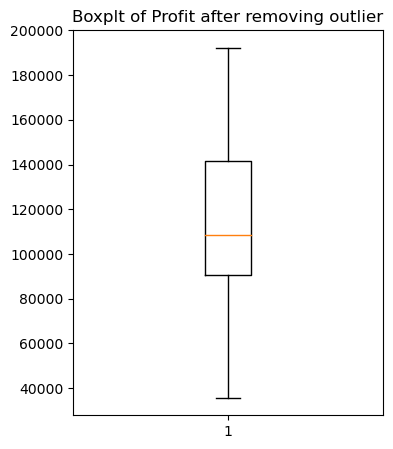

In [60]:
plt.figure(figsize=(4,5))
plt.title('Boxplt of Profit after removing outlier')
plt.boxplot(df['p'])
plt.show()

In [61]:
data.shape #before removing outlier

(50, 5)

In [62]:
df.shape #after removing the outlier

(49, 5)

## Descriptive Statistics after removing the outlier

In [63]:
df.describe()

,rd,a,ms,p
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      49 non-null     float64
 1   a       49 non-null     float64
 2   ms      49 non-null     float64
 3   s       49 non-null     object 
 4   p       49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [65]:
df.corr()

,rd,a,ms,p
rd,1.000000,0.243438,0.711654,0.978437
a,0.243438,1.000000,-0.037280,0.205841
ms,0.711654,-0.037280,1.000000,0.739307
p,0.978437,0.205841,0.739307,1.000000


## Visualization after removing the outlier

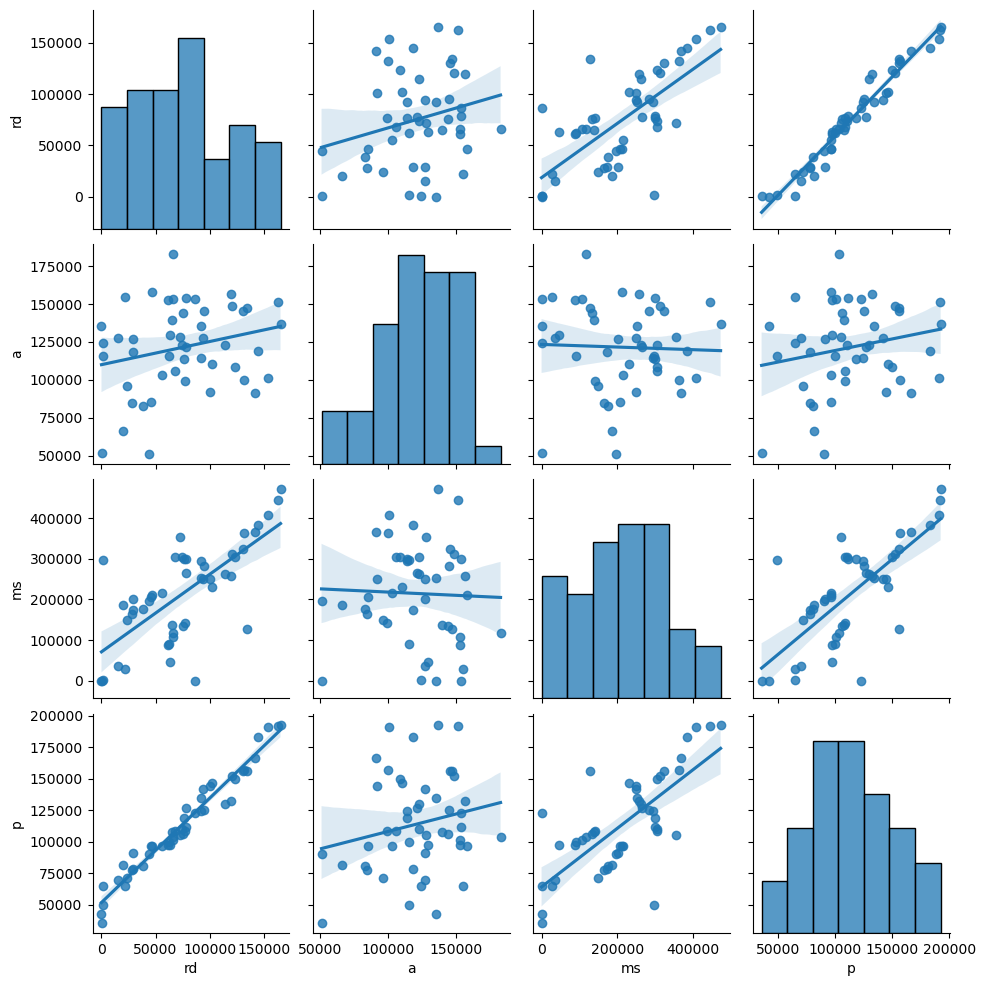

In [66]:
sns.pairplot(df,kind='reg')

## MODEL BUILDING

**Using Ordinary Least Squares Method**

In [67]:
model = smf.ols('p~rd+a+ms',data=df).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           8.85e-32
Time:                        18:37:31   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd             0.7830      0.038     20.470      0.000       0.706       0.860
a             -0.0222      0.043     -0.518      0.607      -0.109       0.064
ms             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model.pvalues

Intercept    2.960000e-12
rd           1.971077e-24
a            6.070728e-01
ms           7.458443e-02
dtype: float64

**From the above, the p-value of a(administration) is 6.070728e-01 > 0.05**

**Therefore, there is a problem of multi-collinearity among profit and administration**

**Resolving the problem of collinearity**

### APPLYING LINEAR REGRESSION

**To check whether the administration has any effect on the profit**

**Dependent variable in simple linear regression:** p(profit)

**Independent variable in simple linear regression:** a(administration)

In [70]:
model_slr=smf.ols('p~a',df).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 31 Jan 2024   Prob (F-statistic):              0.156
Time:                        18:37:31   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
a              0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
model_slr.pvalues

Intercept    0.001618
a            0.155918
dtype: float64

**Since, the p-value for a(administration) is 0.155 which is greater than significant level (0.05). variable 'a' is insignificant in the model**

In [72]:
model=smf.ols('p~rd+ms',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           3.74e-33
Time:                        18:37:32   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
rd             0.7754      0.035     22.136      0.000       0.705       0.846
ms             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
model.pvalues

Intercept    1.970460e-25
rd           3.628510e-26
ms           4.084443e-02
dtype: float64

In [74]:
model.rsquared,model.rsquared_adj

(0.9610856807456628, 0.9593937538215612)

**Hence, the accuracy of the model is 96.1%**

## MODEL VALIDATION

Text(0, 0.5, 'standardized residual values')

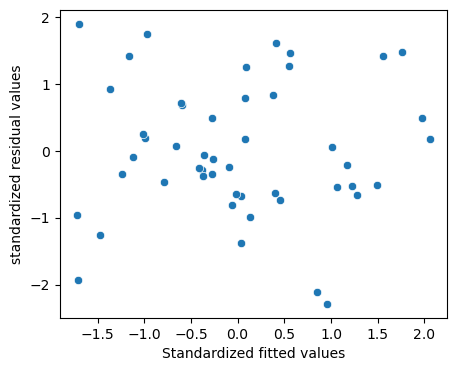

In [75]:
#RESIDUAL PLOT
def standardize(vals):
    e = (vals - vals.mean())/vals.std()
    return e
plt.figure(figsize=(5,4))
sns.scatterplot(x = standardize(model.fittedvalues),y = standardize(model.resid) )
plt.xlabel("Standardized fitted values") # fitted values= predicted values
plt.ylabel("standardized residual values")

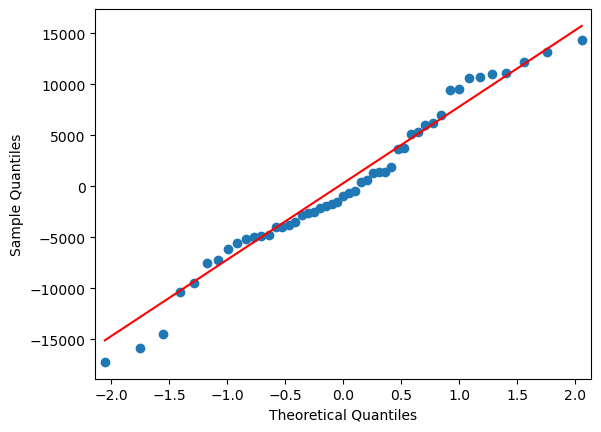

In [76]:
#QQ-PLOT
qq=sm.qqplot(model.resid,line="q")

eval_env: 1


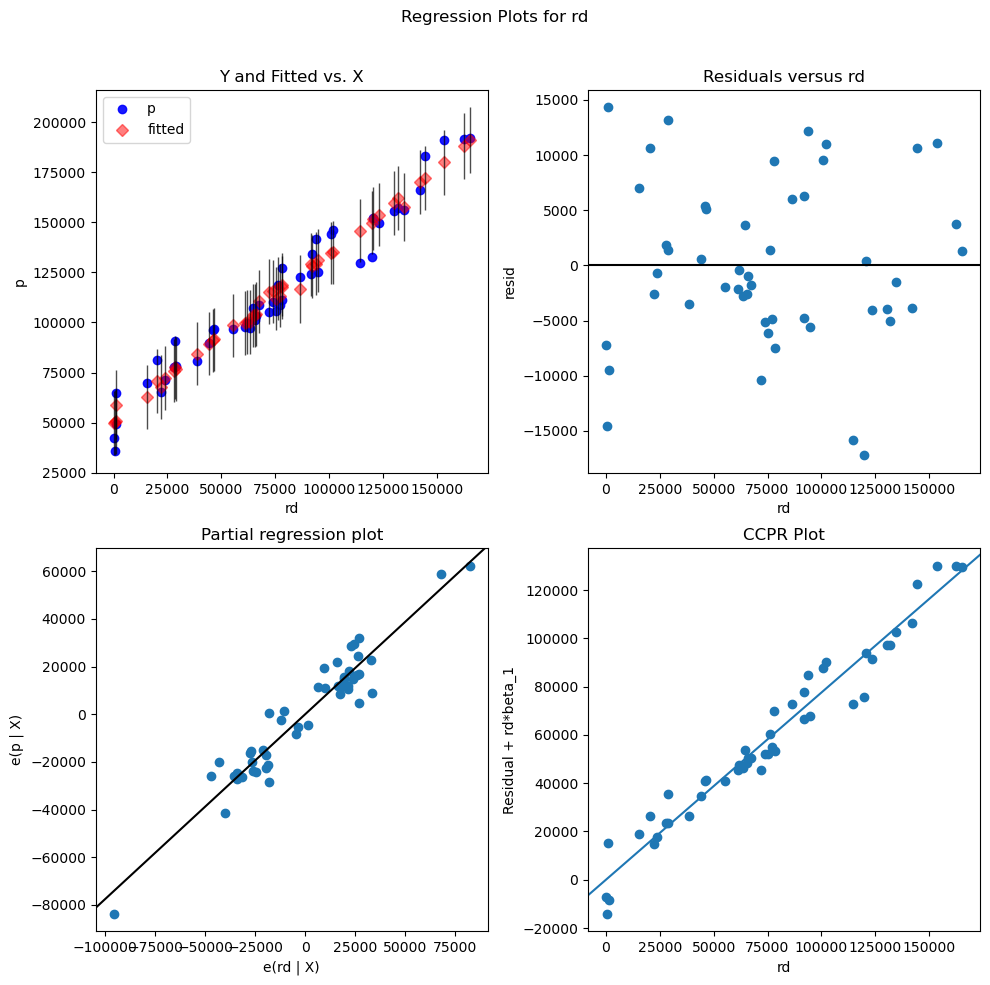

In [77]:
#REGRESSOR VS RESIDUAL PLOT
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(model,'rd',fig=fig)
plt.show()

eval_env: 1


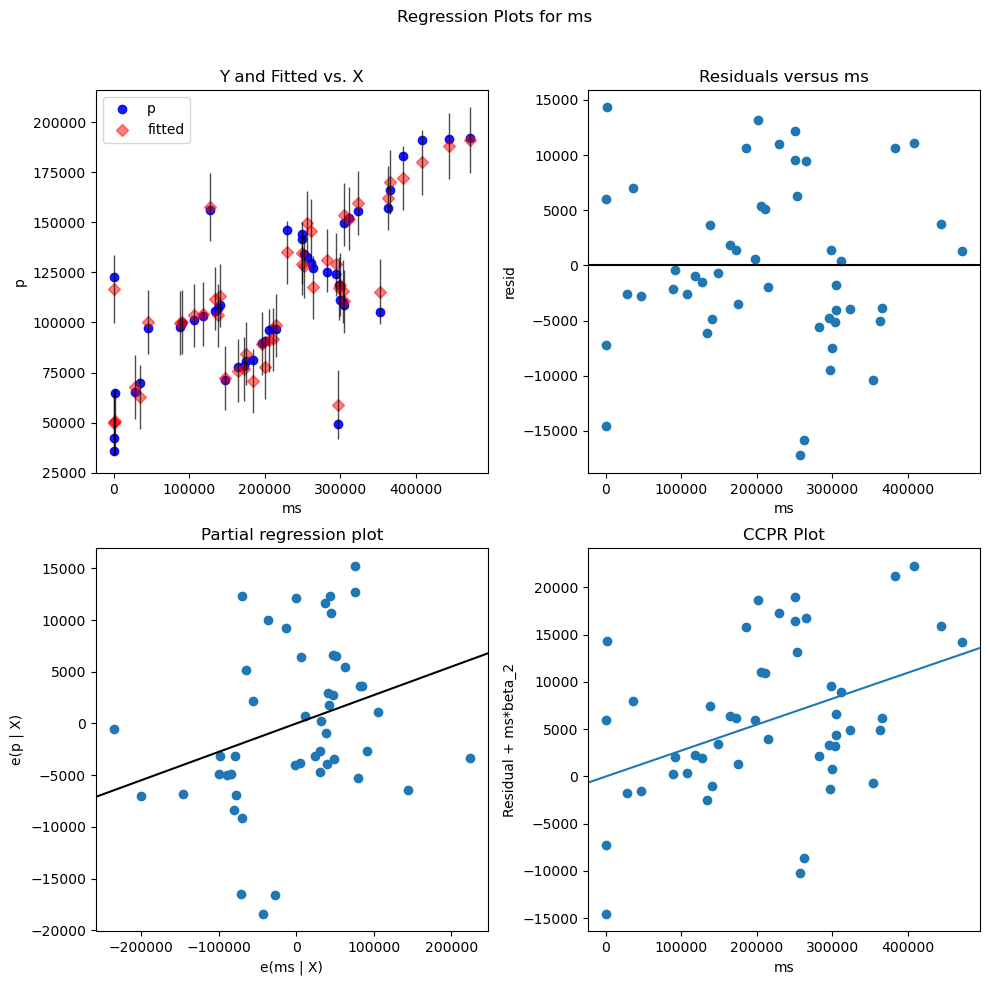

In [78]:
fig=plt.figure(figsize=(10,10))
fig = sm.graphics.plot_regress_exog(model,"ms",fig=fig)
plt.show()

## PREDICTING PROFIT

In [79]:
pred=np.round(model.predict(),2)
pred

array([190942.73, 188043.92, 179957.31, 172246.42, 170022.69, 161999.41,
       157669.18, 159705.3 , 151804.38, 153787.52, 135096.47, 134699.05,
       129422.68, 128049.2 , 149827.45, 145769.61, 117530.49, 130936.3 ,
       129020.31, 116793.71, 117108.28, 118793.64, 115484.21, 110513.44,
       113382.1 , 103711.7 , 111873.13, 115389.65, 104243.19, 103595.17,
       100355.93,  99610.63, 100216.31,  98705.15,  91568.75,  91104.34,
        77530.72,  89363.97,  70555.66,  84485.86,  76823.38,  75926.97,
        72178.03,  62783.42,  67759.19,  50613.09,  58959.71,  49785.27,
        50205.57])

In [80]:
df=df.rename({'rd':'R&D Spend','a':'Adminostration','ms':'Marketing Spend','s':'State','p':'Profit'},axis=1)
df['Predicted Profiit']=pred
df

,R&D Spend,Adminostration,Marketing Spend,State,Profit,Predicted Profiit
0,165349.20,136897.80,471784.10,New York,192261.83,190942.73
1,162597.70,151377.59,443898.53,California,191792.06,188043.92
2,153441.51,101145.55,407934.54,Florida,191050.39,179957.31
3,144372.41,118671.85,383199.62,New York,182901.99,172246.42
4,142107.34,91391.77,366168.42,Florida,166187.94,170022.69
5,131876.90,99814.71,362861.36,New York,156991.12,161999.41
6,134615.46,147198.87,127716.82,California,156122.51,157669.18
7,130298.13,145530.06,323876.68,Florida,155752.60,159705.30
8,120542.52,148718.95,311613.29,New York,152211.77,151804.38
9,123334.88,108679.17,304981.62,California,149759.96,153787.52
